In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [2]:
data = pd.read_csv("pks",sep='\t')

In [3]:
datay1 = data[data["is_booking"] == 1]

In [5]:
datay1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12096 entries, 1 to 149996
Data columns (total 25 columns):
Unnamed: 0                   12096 non-null int64
date_time                    12096 non-null object
site_name                    12096 non-null int64
posa_continent               12096 non-null int64
user_location_country        12096 non-null int64
user_location_region         12096 non-null int64
user_location_city           12096 non-null int64
orig_destination_distance    7941 non-null float64
user_id                      12096 non-null int64
is_mobile                    12096 non-null int64
is_package                   12096 non-null int64
channel                      12096 non-null int64
srch_ci                      12096 non-null object
srch_co                      12096 non-null object
srch_adults_cnt              12096 non-null int64
srch_children_cnt            12096 non-null int64
srch_rm_cnt                  12096 non-null int64
srch_destination_id          12096 n

In [6]:
datay0 = data[data["is_booking"] == 0]

In [7]:
datay0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137904 entries, 0 to 149999
Data columns (total 25 columns):
Unnamed: 0                   137904 non-null int64
date_time                    137904 non-null object
site_name                    137904 non-null int64
posa_continent               137904 non-null int64
user_location_country        137904 non-null int64
user_location_region         137904 non-null int64
user_location_city           137904 non-null int64
orig_destination_distance    88350 non-null float64
user_id                      137904 non-null int64
is_mobile                    137904 non-null int64
is_package                   137904 non-null int64
channel                      137904 non-null int64
srch_ci                      137702 non-null object
srch_co                      137702 non-null object
srch_adults_cnt              137904 non-null int64
srch_children_cnt            137904 non-null int64
srch_rm_cnt                  137904 non-null int64
srch_destination_i

In [8]:
datay0n = datay0.head(12000).copy()

In [9]:
data = pd.concat([datay1,datay0n])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24096 entries, 1 to 13057
Data columns (total 25 columns):
Unnamed: 0                   24096 non-null int64
date_time                    24096 non-null object
site_name                    24096 non-null int64
posa_continent               24096 non-null int64
user_location_country        24096 non-null int64
user_location_region         24096 non-null int64
user_location_city           24096 non-null int64
orig_destination_distance    15597 non-null float64
user_id                      24096 non-null int64
is_mobile                    24096 non-null int64
is_package                   24096 non-null int64
channel                      24096 non-null int64
srch_ci                      24084 non-null object
srch_co                      24084 non-null object
srch_adults_cnt              24096 non-null int64
srch_children_cnt            24096 non-null int64
srch_rm_cnt                  24096 non-null int64
srch_destination_id          24096 n

In [18]:
data["orig_destination_distance"].isnull().value_counts()

False    15597
True      8499
Name: orig_destination_distance, dtype: int64

In [24]:
# Split datetime, checkin date, checkout date features to Year and Month
data["date_time"] = pd.to_datetime(data["date_time"])
data["srch_ci"] = pd.to_datetime(data["srch_ci"], format='%Y-%m-%d', errors="coerce")
data["srch_co"] = pd.to_datetime(data["srch_co"], format='%Y-%m-%d', errors="coerce")
data["year"] = data["date_time"].dt.year
data["month"] = data["date_time"].dt.month
data["day"] = data["date_time"].dt.day
data["month"] = data["date_time"].dt.month
data["srch_ci_year"] = data["srch_ci"].dt.year
data["srch_ci_month"] = data["srch_ci"].dt.month
data["srch_ci_day"] = data["srch_ci"].dt.day
data["srch_co_year"] = data["srch_co"].dt.year
data["srch_co_month"] = data["srch_co"].dt.month
data["srch_co_day"] = data["srch_co"].dt.day


In [25]:
data = data[data['srch_ci'].notnull()]

In [26]:
data['stay'] = data["srch_co_day"] - data["srch_ci_day"]

In [28]:
data1 = data.drop(["orig_destination_distance","date_time","srch_ci","srch_co",'Unnamed: 0'],axis=1)

In [29]:
data1.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,...,year,month,day,srch_ci_year,srch_ci_month,srch_ci_day,srch_co_year,srch_co_month,srch_co_day,stay
1,2,3,66,337,36345,961325,0,1,0,2,...,2014,8,8,2014,8,16,2014,8,17,1
3,2,3,66,318,27770,1036521,0,0,9,2,...,2014,6,9,2014,6,13,2014,6,16,3
12,2,3,48,424,35910,185258,0,0,9,1,...,2014,7,24,2014,7,26,2014,7,29,3
16,2,3,66,337,56223,858166,0,0,1,2,...,2013,9,19,2013,9,26,2013,9,27,1
19,2,3,66,318,29466,60161,1,1,0,1,...,2014,3,23,2014,4,7,2014,4,11,4


In [30]:
destination = pd.read_csv("destinations.csv")

In [31]:
merged_df = pd.merge(data1,destination,on="srch_destination_id")

In [32]:
merged_df.head()

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,user_id,is_mobile,is_package,channel,srch_adults_cnt,...,d140,d141,d142,d143,d144,d145,d146,d147,d148,d149
0,2,3,66,337,36345,961325,0,1,0,2,...,-2.347477,-2.340371,-2.350902,-2.299079,-2.297791,-2.345402,-2.350692,-2.347038,-2.351659,-2.338838
1,2,3,66,448,18816,18200,0,0,9,2,...,-2.347477,-2.340371,-2.350902,-2.299079,-2.297791,-2.345402,-2.350692,-2.347038,-2.351659,-2.338838
2,2,3,66,363,3062,814005,0,0,9,1,...,-2.347477,-2.340371,-2.350902,-2.299079,-2.297791,-2.345402,-2.350692,-2.347038,-2.351659,-2.338838
3,2,3,66,314,36941,562791,0,1,1,1,...,-2.347477,-2.340371,-2.350902,-2.299079,-2.297791,-2.345402,-2.350692,-2.347038,-2.351659,-2.338838
4,2,3,66,348,47997,1046387,0,0,9,2,...,-2.347477,-2.340371,-2.350902,-2.299079,-2.297791,-2.345402,-2.350692,-2.347038,-2.351659,-2.338838


In [82]:
X_orig = merged_df.drop("is_booking",axis=1).copy()

In [33]:

X_train = merged_df.drop("is_booking",axis=1).copy().values
y_train = merged_df["is_booking"].copy().values


In [34]:
from sklearn.preprocessing import StandardScaler

size = StandardScaler()

In [35]:
X_train = size.fit_transform(X_train)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
scores.mean()

0.62989546771619054

In [40]:
from sklearn.metrics import precision_score, recall_score
forest_clf.fit(X_train, y_train)

y_pred = forest_clf.predict(X_test)

print("Precision: {:.2f}%".format(precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(recall_score(y_test, y_pred)))

Precision: 0.64%
Recall: 0.56%


In [41]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pred, y_test)


array([[2582, 1773],
       [1284, 2274]], dtype=int64)

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

C:\Users\Pankaj\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([ 0.63996265,  0.61935002,  0.64736645])

In [44]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [45]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[5369, 2687],
       [3167, 4840]], dtype=int64)

In [46]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train, y_train_pred)

0.64301846685266373

In [47]:
recall_score(y_train, y_train_pred)

0.6044710877981766

In [48]:
from sklearn.metrics import f1_score
f1_score(y_train, y_train_pred)

0.6231492210634737

In [49]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")

In [50]:
y_scores

array([[  0.        ,  23.04249064],
       [  0.        ,  -4.00922889],
       [  0.        , -34.90954606],
       ..., 
       [  0.        , -20.65585837],
       [  0.        ,  -0.07924144],
       [  0.        ,  22.86246586]])

In [51]:
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

In [59]:
y_scores.max()

83.436635754194555

In [52]:
y_scores

array([ 23.04249064,  -4.00922889, -34.90954606, ..., -20.65585837,
        -0.07924144,  22.86246586])

In [67]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

In [68]:
thresholds.size

15745

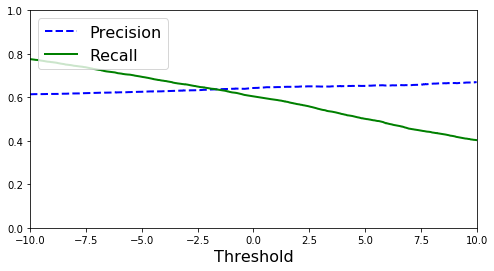

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline 
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-10, 10])

plt.show()

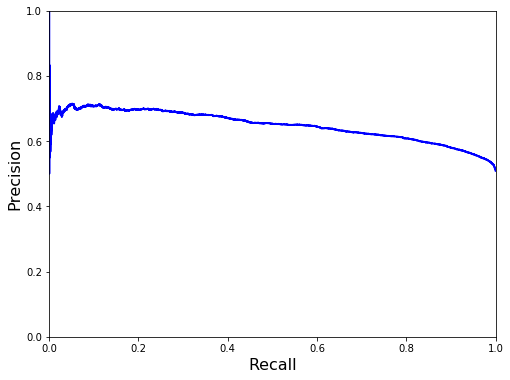

In [71]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)

plt.show()

In [72]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

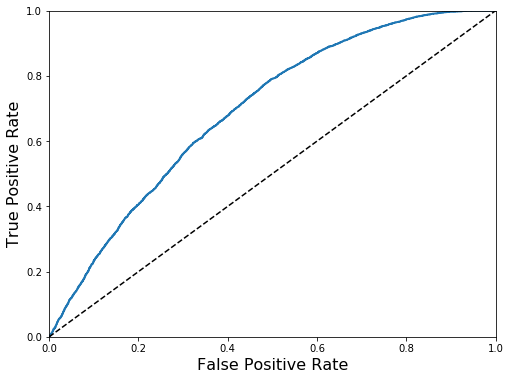

In [73]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
#save_fig("roc_curve_plot")
plt.show()

In [74]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.69499766775570881

In [75]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

In [76]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train,y_scores_forest)

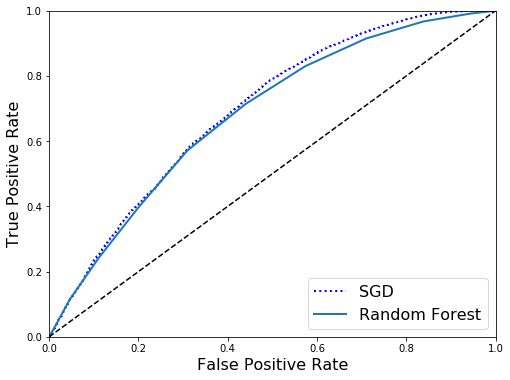

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

log_clf = LogisticRegression()
score = cross_val_score(log_clf, X_train, y_train, cv=3, verbose=3)
score.mean()

[CV]  ................................................................
[CV] ....................... , score=0.6786181139122316, total=   2.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV] ....................... , score=0.6759432200224131, total=   2.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV] ....................... , score=0.6744490100859171, total=   3.0s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    8.9s finished


0.67633678134018727

In [83]:
num_attribs = list(X_orig)
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

['site_name',
 'posa_continent',
 'user_location_country',
 'user_location_region',
 'user_location_city',
 'user_id',
 'is_mobile',
 'is_package',
 'channel',
 'srch_adults_cnt',
 'srch_children_cnt',
 'srch_rm_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'cnt',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'hotel_cluster',
 'year',
 'month',
 'day',
 'srch_ci_year',
 'srch_ci_month',
 'srch_ci_day',
 'srch_co_year',
 'srch_co_month',
 'srch_co_day',
 'stay',
 'd1',
 'd2',
 'd3',
 'd4',
 'd5',
 'd6',
 'd7',
 'd8',
 'd9',
 'd10',
 'd11',
 'd12',
 'd13',
 'd14',
 'd15',
 'd16',
 'd17',
 'd18',
 'd19',
 'd20',
 'd21',
 'd22',
 'd23',
 'd24',
 'd25',
 'd26',
 'd27',
 'd28',
 'd29',
 'd30',
 'd31',
 'd32',
 'd33',
 'd34',
 'd35',
 'd36',
 'd37',
 'd38',
 'd39',
 'd40',
 'd41',
 'd42',
 'd43',
 'd44',
 'd45',
 'd46',
 'd47',
 'd48',
 'd49',
 'd50',
 'd51',
 'd52',
 'd53',
 'd54',
 'd55',
 'd56',
 'd57',
 'd58',
 'd59',
 'd60',
 'd61',
 'd62',
 'd63',
 'd64',
 'd65',

# Knn Classifier

In [131]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier()
scores = cross_val_score(knn_clf, X_train, y_train, cv=10)
scores.mean()

0.58220601906922886


# Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
scores.mean()

0.62989546771619054

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
   
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [88]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [89]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [92]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([ 0.01401286,  0.00736971,  0.01788446,  0.03199815,  0.03663768,
        0.03880025,  0.00636609,  0.00833997,  0.01804974,  0.0182396 ,
        0.0096251 ,  0.00449481,  0.00402135,  0.00139435,  0.06181839,
        0.00206558,  0.00277749,  0.00458379,  0.03298468,  0.00779807,
        0.02833952,  0.03370157,  0.01139546,  0.02851456,  0.03412148,
        0.01206152,  0.02742656,  0.0339214 ,  0.03377034,  0.00310356,
        0.0025821 ,  0.00215256,  0.00236951,  0.00300463,  0.00333888,
        0.00282134,  0.00291247,  0.00602925,  0.00383415,  0.003328  ,
        0.00155397,  0.00323316,  0.00355682,  0.00197653,  0.00473185,
        0.00484174,  0.00251711,  0.00222195,  0.00368442,  0.00285166,
        0.00259795,  0.00165935,  0.00264453,  0.00189385,  0.00374338,
        0.0025499 ,  0.00240519,  0.00395184,  0.00474964,  0.00156026,
        0.00231582,  0.00398933,  0.00295189,  0.00343394,  0.00279192,
        0.00324902,  0.00375359,  0.00227071,  0.00333046,  0.00

In [94]:
sorted(zip(feature_importances, num_attribs), reverse=True)

[(0.061818387845950076, 'cnt'),
 (0.038800248437541957, 'user_id'),
 (0.036637681929547042, 'user_location_city'),
 (0.034121476250294311, 'srch_ci_day'),
 (0.033921398532188791, 'srch_co_day'),
 (0.033770344220660872, 'stay'),
 (0.033701566863250251, 'day'),
 (0.032984675798699258, 'hotel_cluster'),
 (0.031998147387975406, 'user_location_region'),
 (0.028514561565604276, 'srch_ci_month'),
 (0.028339524591313472, 'month'),
 (0.027426564169108429, 'srch_co_month'),
 (0.018239599925569849, 'srch_adults_cnt'),
 (0.018049739427389192, 'channel'),
 (0.017884460444129266, 'user_location_country'),
 (0.014012855901172325, 'site_name'),
 (0.012061518326909883, 'srch_co_year'),
 (0.011395456668661224, 'srch_ci_year'),
 (0.0096251016873895, 'srch_children_cnt'),
 (0.0083399712269082646, 'is_package'),
 (0.0077980736918524052, 'year'),
 (0.0073697149025851042, 'posa_continent'),
 (0.0063660902820782449, 'is_mobile'),
 (0.0060292535801565192, 'd9'),
 (0.0055654452746641582, 'd136'),
 (0.0048417369

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=50),
    }

forest_cla = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(forest_cla, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029CB04CA0B8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029CB04CA320>},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='accuracy', verbose=0)

In [100]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)


0.66923986802 {'max_features': 39, 'n_estimators': 180}
0.652555562473 {'max_features': 29, 'n_estimators': 15}
0.667060947519 {'max_features': 43, 'n_estimators': 72}
0.663450164975 {'max_features': 21, 'n_estimators': 103}
0.66363692959 {'max_features': 19, 'n_estimators': 75}
0.654983502459 {'max_features': 11, 'n_estimators': 88}
0.667870260848 {'max_features': 36, 'n_estimators': 104}
0.665442320862 {'max_features': 24, 'n_estimators': 131}
0.66276536139 {'max_features': 22, 'n_estimators': 53}
0.606611467347 {'max_features': 2, 'n_estimators': 88}


In [101]:
#fit Random forest again w

In [102]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42,max_features=39,n_estimators=100)
scores = cross_val_score(forest_clf, X_train, y_train, cv=5)
scores.mean()

0.67042204275609008

# VOTING CLASSIFIER , hard and soft

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [105]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.674838872741
RandomForestClassifier 0.613673701504
SVC 0.669278402629
VotingClassifier 0.672185012006


In [106]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [107]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.674838872741
RandomForestClassifier 0.613673701504
SVC 0.669278402629
VotingClassifier 0.670163022874


# Adaboost

In [111]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=300,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=300, random_state=42)

In [112]:
y_pred = ada_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.67142676608113228

# Gradient Boosting

In [113]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [114]:
y_pred = gbrt.predict(X_test)
accuracy_score(y_test, y_pred)

0.689245545305194

# ANN

In [119]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

Using TensorFlow backend.


In [120]:
# Initialising the ANN
classifier = Sequential()

In [121]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu', input_dim = 178))

In [122]:
# Adding the second hidden layer
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

In [123]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [124]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [125]:
# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
16063/16063 [==============================] - 4s 279us/step - loss: 0.6475 - acc: 0.6155
Epoch 2/100
16063/16063 [==============================] - 4s 221us/step - loss: 0.5807 - acc: 0.6733
Epoch 3/100
16063/16063 [==============================] - 4s 223us/step - loss: 0.5712 - acc: 0.6815
Epoch 4/100
16063/16063 [==============================] - 3s 203us/step - loss: 0.5682 - acc: 0.6852
Epoch 5/100
16063/16063 [==============================] - 4s 231us/step - loss: 0.5658 - acc: 0.6876
Epoch 6/100
16063/16063 [==============================] - 4s 230us/step - loss: 0.5624 - acc: 0.6916
Epoch 7/100
16063/16063 [==============================] - 4s 227us/step - loss: 0.5614 - acc: 0.6912
Epoch 8/100
16063/16063 [==============================] - 4s 247us/step - loss: 0.5591 - acc: 0.6951
Epoch 9/100
16063/16063 [==============================] - 3s 162us/step - loss: 0.5572 - acc: 0.6973
Epoch 10/100
16063/16063 [==============================] - 3s 161us/step - loss: 

16063/16063 [==============================] - 4s 221us/step - loss: 0.4659 - acc: 0.7579
Epoch 80/100
16063/16063 [==============================] - 4s 221us/step - loss: 0.4618 - acc: 0.7614
Epoch 81/100
16063/16063 [==============================] - 4s 225us/step - loss: 0.4651 - acc: 0.7588
Epoch 82/100
16063/16063 [==============================] - 4s 226us/step - loss: 0.4618 - acc: 0.7606
Epoch 83/100
16063/16063 [==============================] - 4s 224us/step - loss: 0.4598 - acc: 0.7605
Epoch 84/100
16063/16063 [==============================] - 4s 221us/step - loss: 0.4608 - acc: 0.7626
Epoch 85/100
16063/16063 [==============================] - 4s 230us/step - loss: 0.4603 - acc: 0.7618
Epoch 86/100
16063/16063 [==============================] - 4s 232us/step - loss: 0.4565 - acc: 0.7624
Epoch 87/100
16063/16063 [==============================] - 4s 230us/step - loss: 0.4580 - acc: 0.7617
Epoch 88/100
16063/16063 [==============================] - 4s 234us/step - loss: 0.46